In [3]:
import import_ipynb
import cv2 as cv
from util import super_res

image = cv.imread("examples/Screenshot (1535).png")
hr_image = super_res(image)
cv.imwrite("examples/Screenshot(1535) upscaled.png", hr_image)

True

loading Roboflow workspace...
loading Roboflow project...


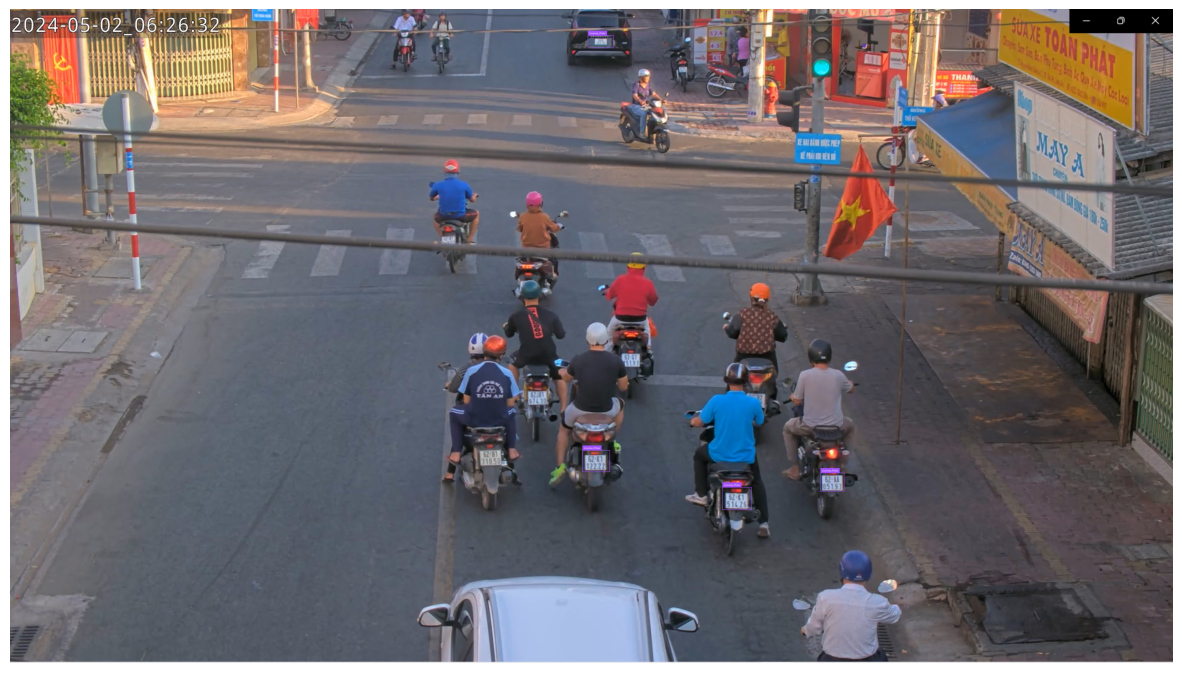

In [3]:
from roboflow import Roboflow
import supervision as sv
import cv2 as cv

rf = Roboflow(api_key="oDeUTrX8zHMB7PPheRmT")
project = rf.workspace().project("anpr-bpzor")
model = project.version(1).model

result = model.predict("examples/Screenshot(1535) upscaled.png", confidence=20, overlap=1).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()
image = cv.imread("examples/Screenshot(1535) upscaled.png")

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)
sv.plot_image(annotated_image, (15, 15))

In [4]:
import import_ipynb
import cv2 as cv
from util import super_res
from util import preprocess
from util import read_plate

for bbox in detections.xyxy:
   x1, y1, x2, y2 = bbox
   cropped_image = image[int(y1):int(y2), int(x1):int(x2)]
   binary_image = preprocess(cropped_image)
   read_plate(binary_image)
   # cv.imshow("frame", cropped_image)
   # key = cv.waitKey(0)
   # if key == 27:
   #    cv.destroyAllWindows()
   #    break
# cv.destroyAllWindows()

62 [
51026
02 M
9519}
